In [1]:
from keras import optimizers, regularizers
from keras.layers import Dense, Dropout, Input
from keras.models import Model, Sequential
from random import shuffle
from scipy import interp
from scipy.stats.mstats import gmean
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import QuantileTransformer
import contextlib
import glob
import gzip
import h5py
import keras
import numpy as np
import os
import pandas as pd
import pylab as plt
import random
import scipy
import sklearn
import tensorflow as tf
random_state = np.random.RandomState(0)

Using TensorFlow backend.


In [2]:
X_f_ext = '/home/drewe/notebooks/genotox/mutagenicity-mod-2.csv'
y_f_ext = '/home/drewe/notebooks/genotox/outcome-mod-2.csv'

X_ext = np.float64(pd.read_csv(X_f_ext,sep=';').values[:,1:])
y_ext = np.float64(pd.read_csv(y_f_ext).values)

print(X_ext.shape)
print(y_ext.shape)


ix = [i for i in range(y_ext.shape[0])]
shuffle(ix)
X_ext  = X_ext[ix, :]
y_ext = y_ext[ix]
names = pd.read_csv(X_f_ext,sep=';')['Name'][ix].values
#X_norm = QuantileTransformer(output_distribution='uniform').fit_transform(X.values.T).T
X = sklearn.preprocessing.quantile_transform(X_ext, axis=1, output_distribution='uniform', copy=True)
y = y_ext[: ,0]



(8080, 1442)
(8080, 1)


>>
.
Epoch 1/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6294 - acc: 0.6390
Epoch 2/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6295 - acc: 0.6432
Epoch 3/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6239 - acc: 0.6494
Epoch 4/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6283 - acc: 0.6398
Epoch 5/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6267 - acc: 0.6416
Epoch 6/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6258 - acc: 0.6399
Epoch 7/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6254 - acc: 0.6481
Epoch 8/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6211 - acc: 0.6467
Epoch 9/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6289 - acc: 0.6419
Epoch 10/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6246 - acc: 0.6465
Epoch 11/50
72

Epoch 16/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6199 - acc: 0.6452
Epoch 17/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6223 - acc: 0.6435
Epoch 18/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6319 - acc: 0.6349
Epoch 19/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6220 - acc: 0.6395
Epoch 20/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6236 - acc: 0.6415
Epoch 21/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6226 - acc: 0.6369
Epoch 22/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6271 - acc: 0.6351
Epoch 23/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6218 - acc: 0.6452
Epoch 24/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6264 - acc: 0.6390
Epoch 25/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6257 - acc: 0.6428
Epoch 26/5

7271/7271 [==============================] - 0s 37us/step - loss: 0.6273 - acc: 0.6343
Epoch 31/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6156 - acc: 0.6498
Epoch 32/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6182 - acc: 0.6431
Epoch 33/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6159 - acc: 0.6494
Epoch 34/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6269 - acc: 0.6421
Epoch 35/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6148 - acc: 0.6489
Epoch 36/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6225 - acc: 0.6450
Epoch 37/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6154 - acc: 0.6481
Epoch 38/50
7271/7271 [==============================] - 0s 39us/step - loss: 0.6131 - acc: 0.6538
Epoch 39/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6151 - acc: 0.6497
Epoch 40/50
7271/7271 

Epoch 13/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6233 - acc: 0.6423
Epoch 14/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6205 - acc: 0.6441
Epoch 15/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6211 - acc: 0.6399
Epoch 16/50
7271/7271 [==============================] - 0s 37us/step - loss: 0.6194 - acc: 0.6415
Epoch 17/50
7271/7271 [==============================] - 0s 39us/step - loss: 0.6138 - acc: 0.6515
Epoch 18/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6169 - acc: 0.6419
Epoch 19/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6236 - acc: 0.6369
Epoch 20/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6208 - acc: 0.6464
Epoch 21/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6174 - acc: 0.6465
Epoch 22/50
7271/7271 [==============================] - 0s 38us/step - loss: 0.6186 - acc: 0.6431
Epoch 23/5

7272/7272 [==============================] - 0s 39us/step - loss: 0.6182 - acc: 0.6418
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6226 - acc: 0.6438
Epoch 29/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6225 - acc: 0.6397
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6165 - acc: 0.6478
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6156 - acc: 0.6438
Epoch 32/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6232 - acc: 0.6405
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6281 - acc: 0.6452
Epoch 34/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6252 - acc: 0.6427
Epoch 35/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6237 - acc: 0.6405
Epoch 36/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6218 - acc: 0.6498
Epoch 37/50
7272/7272 

Epoch 10/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6373 - acc: 0.6301
Epoch 11/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6356 - acc: 0.6279
Epoch 12/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6360 - acc: 0.6311
Epoch 13/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6317 - acc: 0.6388
Epoch 14/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6378 - acc: 0.6312
Epoch 15/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6318 - acc: 0.6306
Epoch 16/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6324 - acc: 0.6425
Epoch 17/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6310 - acc: 0.6404
Epoch 18/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6279 - acc: 0.6408
Epoch 19/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6317 - acc: 0.6370
Epoch 20/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.6248 - acc: 0.6441
Epoch 25/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6277 - acc: 0.6357
Epoch 26/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6268 - acc: 0.6405
Epoch 27/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6230 - acc: 0.6437
Epoch 28/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6228 - acc: 0.6415
Epoch 29/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6283 - acc: 0.6382
Epoch 30/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6213 - acc: 0.6520
Epoch 31/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6248 - acc: 0.6433
Epoch 32/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6243 - acc: 0.6333
Epoch 33/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6238 - acc: 0.6456
Epoch 34/50
7272/7272 

Epoch 39/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6291 - acc: 0.6379
Epoch 40/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6324 - acc: 0.6353
Epoch 41/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6258 - acc: 0.6423
Epoch 42/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6240 - acc: 0.6433
Epoch 43/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6255 - acc: 0.6378
Epoch 44/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6240 - acc: 0.6360
Epoch 45/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6244 - acc: 0.6381
Epoch 46/50
7272/7272 [==============================] - 0s 40us/step - loss: 0.6234 - acc: 0.6441
Epoch 47/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6246 - acc: 0.6400
Epoch 48/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6233 - acc: 0.6421
Epoch 49/5

7272/7272 [==============================] - 0s 39us/step - loss: 0.6326 - acc: 0.6350
Epoch 4/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6358 - acc: 0.6324
Epoch 5/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6314 - acc: 0.6385
Epoch 6/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6280 - acc: 0.6378
Epoch 7/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6290 - acc: 0.6337
Epoch 8/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6323 - acc: 0.6272
Epoch 9/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6266 - acc: 0.6367
Epoch 10/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6275 - acc: 0.6390
Epoch 11/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6309 - acc: 0.6438
Epoch 12/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6273 - acc: 0.6322
Epoch 13/50
7272/7272 [=====

Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6286 - acc: 0.6418
Epoch 37/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6246 - acc: 0.6422
Epoch 38/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6278 - acc: 0.6452
Epoch 39/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6271 - acc: 0.6455
Epoch 40/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6268 - acc: 0.6443
Epoch 41/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6241 - acc: 0.6434
Epoch 42/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6348 - acc: 0.6279
Epoch 43/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6223 - acc: 0.6498
Epoch 44/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6266 - acc: 0.6422
Epoch 45/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6234 - acc: 0.6403
Epoch 46/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.6168 - acc: 0.6500
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6327 - acc: 0.6396
Epoch 2/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6305 - acc: 0.6348
Epoch 3/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6273 - acc: 0.6423
Epoch 4/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6256 - acc: 0.6465
Epoch 5/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6353 - acc: 0.6320
Epoch 6/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6279 - acc: 0.6422
Epoch 7/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6296 - acc: 0.6422
Epoch 8/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6296 - acc: 0.6423
Epoch 9/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6280 - acc: 0.6448
Epoch 10/50
7272/7272 [===

Epoch 33/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6247 - acc: 0.6408
Epoch 34/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6248 - acc: 0.6451
Epoch 35/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6201 - acc: 0.6520
Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6196 - acc: 0.6503
Epoch 37/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6231 - acc: 0.6433
Epoch 38/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6205 - acc: 0.6463
Epoch 39/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6224 - acc: 0.6433
Epoch 40/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6254 - acc: 0.6400
Epoch 41/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6233 - acc: 0.6433
Epoch 42/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6194 - acc: 0.6462
Epoch 43/5

7272/7272 [==============================] - 0s 37us/step - loss: 0.6253 - acc: 0.6378
Epoch 48/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6190 - acc: 0.6503
Epoch 49/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6191 - acc: 0.6467
Epoch 50/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6278 - acc: 0.6425
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6265 - acc: 0.6337
Epoch 2/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6319 - acc: 0.6287
Epoch 3/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6292 - acc: 0.6342
Epoch 4/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6269 - acc: 0.6429
Epoch 5/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6273 - acc: 0.6370
Epoch 6/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6264 - acc: 0.6360
Epoch 7/50
7272/7272 [=

Epoch 30/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6221 - acc: 0.6449
Epoch 31/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6160 - acc: 0.6477
Epoch 32/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6175 - acc: 0.6480
Epoch 33/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6216 - acc: 0.6518
Epoch 34/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6194 - acc: 0.6487
Epoch 35/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6147 - acc: 0.6487
Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6201 - acc: 0.6460
Epoch 37/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6183 - acc: 0.6433
Epoch 38/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6129 - acc: 0.6550
Epoch 39/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6102 - acc: 0.6579
Epoch 40/5

7272/7272 [==============================] - 0s 38us/step - loss: 0.6175 - acc: 0.6437
Epoch 45/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6180 - acc: 0.6478
Epoch 46/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6198 - acc: 0.6397
Epoch 47/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6181 - acc: 0.6410
Epoch 48/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6167 - acc: 0.6426
Epoch 49/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6162 - acc: 0.6469
Epoch 50/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6150 - acc: 0.6477
>>
.
Epoch 1/50
7272/7272 [==============================] - 0s 37us/step - loss: 0.6252 - acc: 0.6426
Epoch 2/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6315 - acc: 0.6366
Epoch 3/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6320 - acc: 0.6379
Epoch 4/50
7272/7272

Epoch 27/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6235 - acc: 0.6385
Epoch 28/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6216 - acc: 0.6401
Epoch 29/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6267 - acc: 0.6403
Epoch 30/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6196 - acc: 0.6467
Epoch 31/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6176 - acc: 0.6465
Epoch 32/50
7272/7272 [==============================] - 0s 39us/step - loss: 0.6196 - acc: 0.6400
Epoch 33/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6177 - acc: 0.6432
Epoch 34/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6253 - acc: 0.6315
Epoch 35/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6196 - acc: 0.6426
Epoch 36/50
7272/7272 [==============================] - 0s 38us/step - loss: 0.6200 - acc: 0.6399
Epoch 37/5

7273/7273 [==============================] - 0s 38us/step - loss: 0.6091 - acc: 0.6486
Epoch 42/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6055 - acc: 0.6541
Epoch 43/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.6120 - acc: 0.6504
Epoch 44/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6160 - acc: 0.6473
Epoch 45/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6048 - acc: 0.6517
Epoch 46/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6177 - acc: 0.6461
Epoch 47/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6125 - acc: 0.6520
Epoch 48/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.6131 - acc: 0.6519
Epoch 49/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6154 - acc: 0.6498
Epoch 50/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.6199 - acc: 0.6388
>>
.
Epoch 1/50
7273/7

Epoch 24/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6337 - acc: 0.6388
Epoch 25/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6271 - acc: 0.6495
Epoch 26/50
7273/7273 [==============================] - 0s 39us/step - loss: 0.6259 - acc: 0.6506
Epoch 27/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6272 - acc: 0.6471
Epoch 28/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6313 - acc: 0.6453
Epoch 29/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6329 - acc: 0.6395
Epoch 30/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6281 - acc: 0.6495
Epoch 31/50
7273/7273 [==============================] - 0s 39us/step - loss: 0.6284 - acc: 0.6493
Epoch 32/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6263 - acc: 0.6539
Epoch 33/50
7273/7273 [==============================] - 0s 39us/step - loss: 0.6274 - acc: 0.6479
Epoch 34/5

Epoch 39/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6230 - acc: 0.6351
Epoch 40/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6238 - acc: 0.6405
Epoch 41/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6210 - acc: 0.6431
Epoch 42/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6224 - acc: 0.6399
Epoch 43/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6214 - acc: 0.6440
Epoch 44/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6234 - acc: 0.6387
Epoch 45/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6355 - acc: 0.6295
Epoch 46/50
7273/7273 [==============================] - 0s 37us/step - loss: 0.6204 - acc: 0.6429
Epoch 47/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6293 - acc: 0.6312
Epoch 48/50
7273/7273 [==============================] - 0s 38us/step - loss: 0.6257 - acc: 0.6406
Epoch 49/5

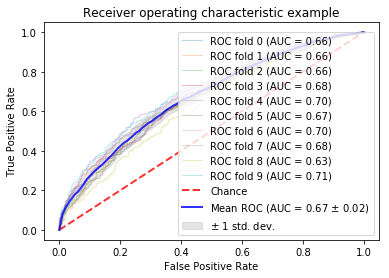

array([0.48989287, 0.59242761, 0.59383744, ..., 0.50447261, 0.47094053,
       0.76454699])

In [3]:
cv = StratifiedKFold(n_splits=10)
results = np.zeros_like(y)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    keras.backend.clear_session()
    prbs=[]
    for mod in range(5):
        print('>>')
        curr_try = 0
        while curr_try <10:
            print('.')

            model = Sequential()
            model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(64, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            # Compile model
            opt = keras.optimizers.Adam(epsilon=None, amsgrad=True)
            model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
            
            # Fit the model
            history = model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=0)
            if history.history['acc'][-1] > 0.53:
                break
            else:
                curr_try += 1

        # Fit the model
        model.fit(X[train,:], y[train], epochs=50, batch_size=64, verbose=1)
        
        # evaluate the model
        probas_ = model.predict(X[test,:])
        prbs.append(probas_)
    # Average the predictions
    probas_ = np.mean(np.hstack(prbs), axis=1)
    results[test] = probas_
    
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas_[ :])
    print('   ' + str(auc(fpr, tpr)))
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
results

In [4]:
df_results = pd.DataFrame(data={"name": names, 'pred': results})
df_results.to_csv('/home/drewe/notebooks/genotox/pred_ext.csv', index=None)

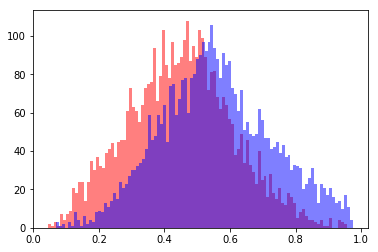

In [5]:
plt.hist(results[y==0],100, color='red', alpha=0.5)
plt.hist(results[y==1],100, color='blue', alpha=0.5)
plt.show()